In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #city_id = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_id
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        #cities.append(city_id)

# Print the city count to confirm sufficient count
len(cities)


608

In [21]:
#base_url = "https://openweathermap.org/api"
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

df =pd.DataFrame(columns = ["City","Cloudiness", "Country",
                                    "Date", "Max Temp", "Wind Speed", 
                                    "Lat","Lng", "Humidity"])

print("Beginning Data Retrieval\n"   
"-----------------------------")
     
index=0

cnt=0

for city_name in cities :
    cnt=cnt+1
    
    query_url = f"{base_url}q={city_name}&appid={api_key}&units=imperial"
    print("Processing Record " + str(cnt) + " of Set " + str(len(cities)) + " | " + city_name)
    
    # get method of requests module 
    # return response object 
    response = requests.get(query_url) 

    # json method of response object  
    # convert json format data into 
    # python format data 
    x = response.json() 
    #print(x.items())
    
    # Now x contains list of nested dictionaries 
    # Check the value of "cod" key is equal to 
    # "404", means city is found otherwise, 
    # city is not found 
    if x["cod"] != "404": 
        # store the value of "main" 
        # key in variable y 
        y = x["main"] 
        
        df.set_value(index, "City", x["name"])
        df.set_value(index, "Cloudiness", x["clouds"]["all"])
        df.set_value(index, "Country", x["sys"]["country"])
        df.set_value(index, "Date", x["dt"])
        df.set_value(index, "Max Temp", x["main"]["temp_max"])
        df.set_value(index, "Wind Speed", x["wind"]["speed"])
        df.set_value(index, "Lat", x["coord"]["lat"])
        df.set_value(index, "Lng", x["coord"]["lon"])
        df.set_value(index, "Humidity", x["main"]["humidity"])
        index = index +1         
    else:     
        print("City not found. Skipping...")

print("-----------------------------\n"
"Data Retrieval Complete\n"
"-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 608 | palabuhanratu
City not found. Skipping...
Processing Record 2 of Set 608 | kahului


C:\Users\wgwat\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\wgwat\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\wgwat\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\wgwat\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\wgwat\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\wgwat\Anaconda3\lib\s

Processing Record 3 of Set 608 | codrington
Processing Record 4 of Set 608 | ushuaia
Processing Record 5 of Set 608 | dikson
Processing Record 6 of Set 608 | touros
Processing Record 7 of Set 608 | thompson
Processing Record 8 of Set 608 | rikitea
Processing Record 9 of Set 608 | nikolayevka
Processing Record 10 of Set 608 | evanston
Processing Record 11 of Set 608 | menongue
Processing Record 12 of Set 608 | atuona
Processing Record 13 of Set 608 | butaritari
Processing Record 14 of Set 608 | hithadhoo
Processing Record 15 of Set 608 | port elizabeth
Processing Record 16 of Set 608 | villamontes
Processing Record 17 of Set 608 | tarudant
City not found. Skipping...
Processing Record 18 of Set 608 | new norfolk
Processing Record 19 of Set 608 | gizo
Processing Record 20 of Set 608 | coahuayana
Processing Record 21 of Set 608 | asau
City not found. Skipping...
Processing Record 22 of Set 608 | chumikan
Processing Record 23 of Set 608 | tiksi
Processing Record 24 of Set 608 | sola
Proces

Processing Record 182 of Set 608 | valparaiso
Processing Record 183 of Set 608 | umuarama
Processing Record 184 of Set 608 | shiyan
Processing Record 185 of Set 608 | kedzierzyn-kozle
Processing Record 186 of Set 608 | cervo
Processing Record 187 of Set 608 | clyde river
Processing Record 188 of Set 608 | balimo
City not found. Skipping...
Processing Record 189 of Set 608 | tasbuget
City not found. Skipping...
Processing Record 190 of Set 608 | beian
Processing Record 191 of Set 608 | luba
Processing Record 192 of Set 608 | chico
Processing Record 193 of Set 608 | baykit
Processing Record 194 of Set 608 | marcona
City not found. Skipping...
Processing Record 195 of Set 608 | northam
Processing Record 196 of Set 608 | eureka
Processing Record 197 of Set 608 | lagoa
Processing Record 198 of Set 608 | mitsamiouli
Processing Record 199 of Set 608 | vestbygda
City not found. Skipping...
Processing Record 200 of Set 608 | jardim
Processing Record 201 of Set 608 | lorengau
Processing Record 2

Processing Record 349 of Set 608 | sorland
Processing Record 350 of Set 608 | green river
Processing Record 351 of Set 608 | portland
Processing Record 352 of Set 608 | tabuk
Processing Record 353 of Set 608 | nkoteng
Processing Record 354 of Set 608 | san cristobal
Processing Record 355 of Set 608 | sao joao da barra
Processing Record 356 of Set 608 | adrar
Processing Record 357 of Set 608 | nantucket
Processing Record 358 of Set 608 | bela
Processing Record 359 of Set 608 | westport
Processing Record 360 of Set 608 | arraial do cabo
Processing Record 361 of Set 608 | port blair
Processing Record 362 of Set 608 | seoul
Processing Record 363 of Set 608 | kralendijk
Processing Record 364 of Set 608 | marseille
Processing Record 365 of Set 608 | ati
Processing Record 366 of Set 608 | montepuez
Processing Record 367 of Set 608 | sal rei
Processing Record 368 of Set 608 | cartagena
Processing Record 369 of Set 608 | kizema
Processing Record 370 of Set 608 | wajima
Processing Record 371 of 

Processing Record 528 of Set 608 | veraval
Processing Record 529 of Set 608 | havelock
Processing Record 530 of Set 608 | tairua
Processing Record 531 of Set 608 | ossora
Processing Record 532 of Set 608 | dongling
Processing Record 533 of Set 608 | tigil
Processing Record 534 of Set 608 | la paz
Processing Record 535 of Set 608 | maloshuyka
City not found. Skipping...
Processing Record 536 of Set 608 | santa quiteria do maranhao
Processing Record 537 of Set 608 | velikiy ustyug
Processing Record 538 of Set 608 | lavrentiya
Processing Record 539 of Set 608 | turayf
Processing Record 540 of Set 608 | chekhov
Processing Record 541 of Set 608 | ucluelet
Processing Record 542 of Set 608 | bur gabo
City not found. Skipping...
Processing Record 543 of Set 608 | makubetsu
Processing Record 544 of Set 608 | labrea
City not found. Skipping...
Processing Record 545 of Set 608 | angoche
Processing Record 546 of Set 608 | kudahuvadhoo
Processing Record 547 of Set 608 | kununurra
Processing Record 

In [22]:
df.head()

,City,Cloudiness,Country,Date,Max Temp,Wind Speed,Lat,Lng,Humidity
0,Kahului,40,US,1569358502,89.6,3.36,20.89,-156.47,83
1,Codrington,40,AU,1569358503,61,2.57,-28.95,153.24,93
2,Ushuaia,20,AR,1569358503,51.8,32.21,-54.81,-68.31,70
3,Dikson,100,RU,1569358503,36.13,21.54,73.51,80.55,96
4,Touros,0,BR,1569358504,80.6,13.87,-5.2,-35.46,61


In [23]:
df.to_csv("output_data/cities.csv", index=False)

In [27]:
# create a data frame from cities, lat, and temp
weather_data = df
weather_data.info()
weather_data.head(25)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 538
Data columns (total 9 columns):
City          539 non-null object
Cloudiness    539 non-null object
Country       539 non-null object
Date          539 non-null object
Max Temp      539 non-null object
Wind Speed    539 non-null object
Lat           539 non-null object
Lng           539 non-null object
Humidity      539 non-null object
dtypes: object(9)
memory usage: 62.1+ KB


,City,Cloudiness,Country,Date,Max Temp,Wind Speed,Lat,Lng,Humidity
0,Kahului,40,US,1569358502,89.6,3.36,20.89,-156.47,83
1,Codrington,40,AU,1569358503,61,2.57,-28.95,153.24,93
2,Ushuaia,20,AR,1569358503,51.8,32.21,-54.81,-68.31,70
3,Dikson,100,RU,1569358503,36.13,21.54,73.51,80.55,96
4,Touros,0,BR,1569358504,80.6,13.87,-5.2,-35.46,61
5,Thompson,75,CA,1569358504,55.4,17.22,55.74,-97.86,62
6,Rikitea,57,PF,1569358504,70.69,6.33,-23.12,-134.97,67
7,Nikolayevka,81,RU,1569358504,55.93,14.09,46.73,38.57,64
8,Evanston,1,US,1569358505,81,14.99,42.04,-87.69,50
9,Menongue,0,AO,1569358505,65.47,5.17,-14.66,17.68,16


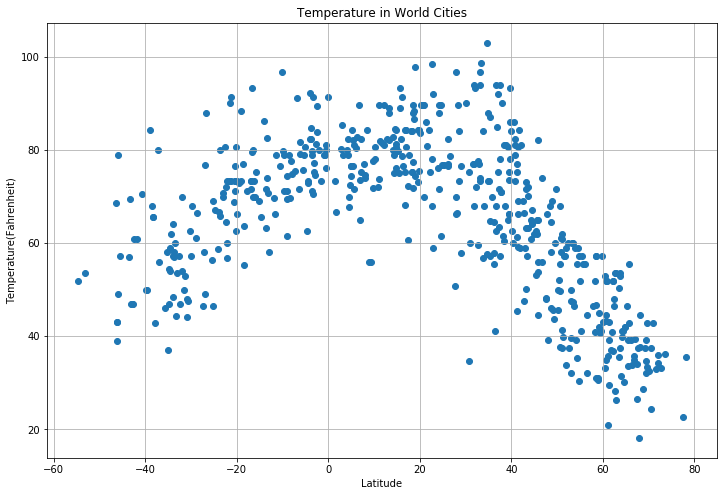

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature(Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_World_Cities.png")

# Show plot
plt.show()

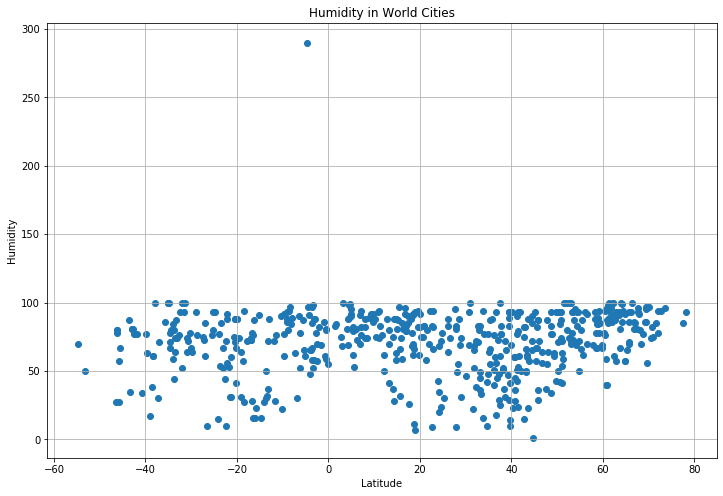

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_World_Cities.png")

# Show plot
plt.show()

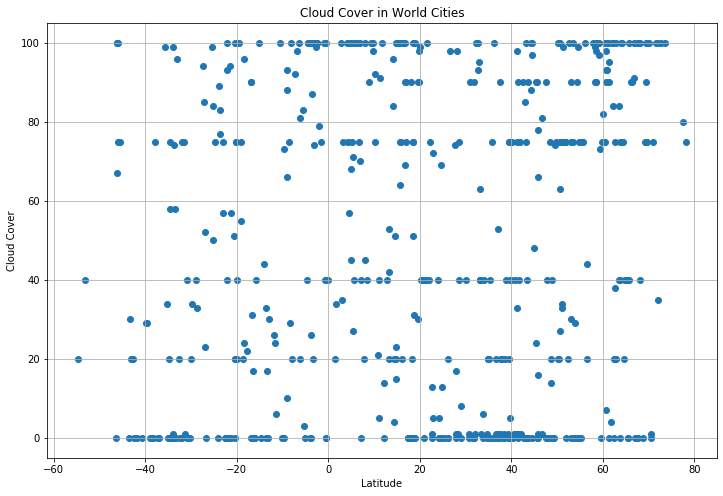

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloud Cover in World Cities")
plt.ylabel("Cloud Cover")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloud_World_Cities.png")

# Show plot
plt.show()

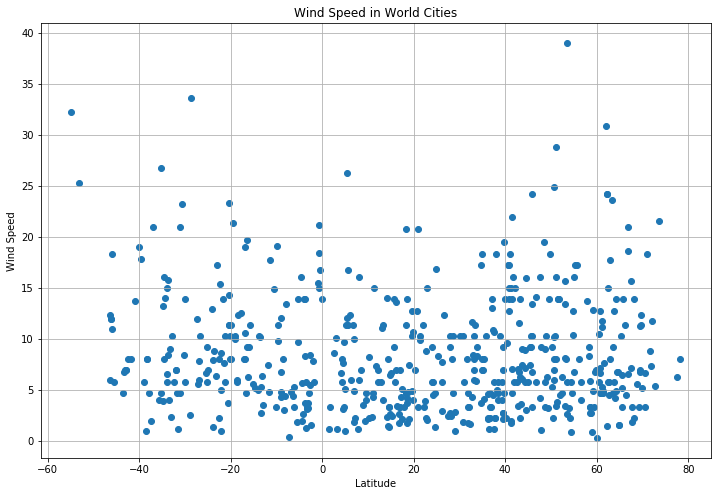

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpd_World_Cities.png")

# Show plot
plt.show()